# Computational Physics
## Simpson's Rule

<img src="https://upload.wikimedia.org/wikipedia/en/6/67/Simpsonsrule2.gif" width=500px>

## Last Time

- Solving for the magnetic field
- Approximating integrals
 - Rectangular rule
 - Trapezoidal rule

## Today

- Simpson's rule
- Improper and divergent integrals

## Setting up the Notebook

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Better Quadrature

We want to come up with a better scaling approximation to the definite integral:

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

where we break up the region of integration into $N$ equally sized regions of size:

\begin{equation}
\Delta x = \frac{b-a}{N}.
\end{equation}

Our previous methods approximated the integral of a single panel $I_i = \int_{x_i}^{x_{i+1}} f(x) dx$ using a $0^{th}$ or $1^{st}$ order polynomial.  Now, let's use a $2^{nd}$ order polynomial:

\begin{equation}
P(x) = \alpha + \beta x + \gamma x^2
\end{equation}

where we need to fix the coefficients $\alpha,\beta,\gamma$ by matching:

\begin{equation}
\int_{x_i}^{x+2} P(x) dx \approx \int_{x_i}^{x_{i+2}} f(x) dx .
\end{equation}

The final answer is: 

\begin{equation}
I_i + I_{i+1} \approx \frac{\Delta x}{3} \left[f(x_i) + 4 f(x_{i+1}) + f(x_{i+2}) \right]
\end{equation}

which needs to be summed over all panels:

\begin{equation}
I_{\rm simps} \approx \frac{\Delta x}{3} \left[f(a) + f(b) + 4\sum_{i=1}^{N/2} f(x_{2i-1}) + 2\sum_{i=1}^{N/2-1} f(x_{2i}) \right]
\end{equation}

<div class="span alert alert-danger">
Note: we need an even number of panels for this to work.
</div>

Let's code it up!

In [ ]:
def simpsons_rule(f,x,*params):
    '''The trapezoidal rule for numerical integration of f(x) over x.'''
    a,b = x[0],x[-1]
    Δx = x[1] - x[0]
    N = x.size
    
    #I = (f(a,*params) + f(b,*params))/3.0
    #I += (4.0/3.0)*np.sum([f(a + j*Δx,*params) for j in range(1,N,2)])
    #I += (2.0/3.0)*np.sum([f(a + j*Δx,*params) for j in range(2,N,2)])
    
    I = (f(a,*params) + f(b,*params))/3.0
    I += (4.0/3.0)*sum([f(a+i*Δx,*params) for i in range(1,N,2)])
    I += (2.0/3.0)*sum([f(a+i*Δx,*params) for i in range(2,N,2)])
    
    return Δx*I

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Use Simpson's rule to evaluate the error function in the range $x\in [0,1]$. Make sure to keep the panel width $\Delta x$ fixed for each value of $x$. Compare with the exact result from scipy.special.
</div>

\begin{equation}
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2} dt 
\end{equation}

Text(0, 0.5, 'erf(x)')

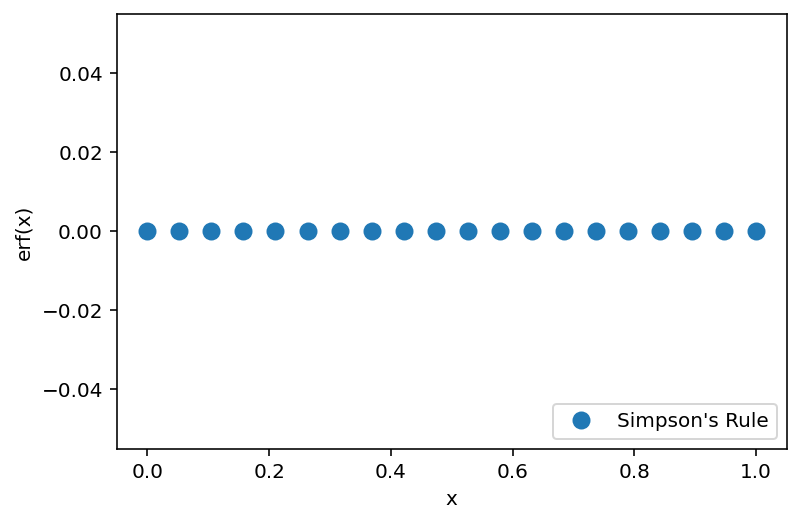

In [6]:
from scipy.constants import pi as  π
from scipy.special import erf

def erf_kernel(t):
    pass

Δx = 0.001
x = np.linspace(0,1,20)
erf_approx = np.zeros_like(x)

for j,cx in enumerate(x[1:]):
    pass

# plot the results and compare with the 'exact' value
plt.plot(x,erf_approx,'o', mec=colors[0], mfc=colors[0], mew=1, ms=8, label="Simpson's Rule")
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('erf(x)')

## Improper Integrals

### Infinite Intervals

Suppose we want to evaluate a definite integral on a semi-infinte interval: $[a,\infty]$ or $[-\infty,b]$.  We can proceed by finding a function $\phi$ which maps the semi-infinite region to a finite one.

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

with $a=-\infty$ or $b = \infty$ but not both.

#### (i) $a\ne 0 \text{ and } b \ne 0$

Consider $y = \phi(x) = \frac{1}{x}$, then:

\begin{align}
I &= \int_a^b f(x) dx \newline
&= \int_{1/a}^{1/b} dy \left(-\frac{1}{y^2}\right) f\left(\frac{1}{y}\right) \newline 
&= \int_{1/b}^{1/a} \frac{dy}{y^2} f\left(\frac{1}{y}\right) .
\end{align}

#### (ii) $a = 0 \text{ and } b = \infty$

Consider $y = \phi(x) = \frac{x}{1+x}$, then:

\begin{align}
y (1+x) &= x \newline
x(1-y) &= y \newline
x &= \phi^{-1}(y) = \frac{y}{1-y}
\end{align}

so:

\begin{equation}
dx = dy \left[\frac{1}{1-y} + \frac{y}{(1-y)^2} \right] \Rightarrow dx = \frac{dy}{(1-y)^2}.
\end{equation}

Finally

\begin{align}
I &= \int_0^\infty f(x) dx \newline
&= \int_{0}^{1} dy\frac{dy}{(1-y)^2} f\left(\frac{y}{1-y}\right) .
\end{align}

### Example
Evaluate the integral:

\begin{equation}
I = \int_0^\infty \frac{dx}{\sqrt{x^4+1}}.
\end{equation}

Initially it looks like we have a problem as we can't directly evaluate $y/(1-y)$ when $y\to 1$ numerically. However, defind a new function:

\begin{align}
g(y) &= \frac{1}{(1-y)^2} f\left(\frac{y}{1-y}\right) \newline
 &= \frac{1}{\sqrt{y^4 + (1-y)^4}}
\end{align}

which has no numerical singularities.

In [ ]:
def f(x):
    return 1.0/np.sqrt(x**4 + 1)

def g(y):
    return 1.0/np.sqrt(y**4 + (1-y)**4)

y = np.linspace(0,1,100000)
print(simpsons_rule(g,y))

1.85408467737


## Scipy.Integrate

Much of what we have learned has already been coded up for you in [`scipy.integrate`](https://docs.scipy.org/doc/scipy-0.18.1/reference/integrate.html) and you should learn how to use these routines.  The workhorse is the [`quad`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) method which is fast, highly accurate and very flexible.  It returns a tuple giving the result of the integral and an estimate of the error.

In [ ]:
from scipy import integrate
print(integrate.quad(f, 0, np.inf))

(1.854074677301372, 2.425014482827383e-10)
